# XỬ LÝ DỮ LIỆU LỚN - Bài tập giữa kỳ
## Đề tài: ??? Khai phá và phân tích dữ liệu
##### Giảng viên: Tiến sĩ Bùi Thanh Hùng (https://sites.google.com/site/hungthanhbui1980)
##### Trình bày: Mai Vinh Hiển - 51703078
##### Bài 1: Phân tích trên 1 tập dữ liệu tự thu thập (5 điểm)
##### 1. Mục đích của bài toán
Nhằm mục đích khai thác dữ liệu sẵn có trên internet (cụ thể là trang báo mạng vnexpress) để phân tích, khai thác xu hướng đọc báo của người Việt.

##### 2. Crawler

In [1]:
!pip install bs4

In [2]:
import re
import bs4
import json
import requests

In [3]:
base_url = "https://vnexpress.net/tin-xem-nhieu"

headers = {
  'Connection': 'keep-alive',
  'Cache-Control': 'max-age=0',
  'Upgrade-Insecure-Requests': '1',
  'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
  'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
  'Referer': 'https://vnexpress.net/tin-xem-nhieu',
  'Accept-Language': 'vi-VN,vi;q=0.9,en-US;q=0.8,en;q=0.7',
  'Cookie': 'PHPSESSID=o8nvojb1l27s54oltf01fo8nd4; __utma=260197448.1967388804.1601447264.1601447264.1601447264.1; __utmc=260197448; __utmz=260197448.1601447264.1.1.utmcsr=l.facebook.com|utmccn=(referral)|utmcmd=referral|utmcct=/; HIM_on_off=0; HIM_method=0; HIM_ckspell=1; HIM_daucu=1; __RC=5; __R=3; __tb=0; __IP=1934568435; __utma=1.1726918794.1601447580.1601447580.1601447580.1; __utmb=1; __utmc=1; __utmz=1.1601447580.1.1.utmccn=(direct)|utmcsr=(direct)|utmcmd=(none); undefined=undefined; __utmb=260197448.60.10.1601447264; __UF=1%2C5; __uif=__create%3A1601447264%7C__uid%3A2261957651906399196; PHPSESSID=375dfv1vk8m0g9m6h0sakfoa14'
}

link_list = []
num_page = 1000

In [4]:
'''
    Get link and push to link_list.
    If link_list > num_page (num article). Stop push
'''
def push_link(x):
    return re.sub(r'.html.*', '.html', str(x.get('href')))

count = 0
while link_list.__len__() < num_page:
    response = requests.request("GET", base_url, headers=headers)
    response = bs4.BeautifulSoup(response.text)
    link_list += [i for i in list(set(list(map(push_link, response.find_all('a'))))) if re.match(r'^https://vnexpress.net/', i) and '.html' in i]
    base_url = link_list[count]
    count += 1
link_list = list(set(link_list))

In [5]:
print(len(link_list))

392


In [6]:
!pip install pandas

In [7]:
import pandas as pd

In [8]:
d = {'title': [], 'description': [], 'article': [], 'category': [], 'viewer': []}
df = pd.DataFrame(data=d)

In [9]:
def request_get_viewer(objectid):
    url = f"https://usi-saas.vnexpress.net/index/get?objectid="+str(objectid)+"&objecttype=1&siteid=1000000"
    
    payload = {}
    
    headers = {
      'Cookie': 'usi.saas=s%3A6iX_xZbKv2XUtaq5XpxVJ7AaIqOgRNPY.nfe9%2Fv60Ly1fm5GTwWB1OZHN%2Fa756a2jhh6Z43L9oRs'
    }
    
    response = requests.request("GET", url, headers=headers, data = payload)

    try:
        ls = [i["full_name"] for i in response.json()["data"]["items"]]
        ls = list(set(ls))
        return ls
    except:
        return ""

In [10]:
for url in link_list:
    try:
        response = requests.request("GET", url, headers=headers)
        response = bs4.BeautifulSoup(response.text)
        id_art = re.search(r'\d{6,}.html', url).group().replace('.html', '')
        category = response.select("ul.breadcrumb")[0].select("a")[0].text
        title = response.select("h1.title-detail")[0].text
        description = response.select("p.description")[0].text
        article = response.select("article.fck_detail")[0].text.strip()
        article = re.sub(r'\W+', " ", article)
        viewer = request_get_viewer(id_art)

        d2 = {'title': [title], 'description': [description], 'article': [article], 'category': [category], 'viewer': [viewer]}
        df2 = pd.DataFrame(data=d2)
        df = df.append(df2)
    except:
        pass

In [11]:
df = df.reset_index(drop=True)

In [12]:
df

,title,description,article,category,viewer
0,"Cắt ngực, bước rủi ro chuyển giới nữ thành nam",TP HCMNhiều người cắt vú để chuyển ngoại hình ...,Quân một người chuyển giới nữ sang nam không m...,Sức khỏe,"[omega, Mai Nguyễn, Ph Trung, Hương, Chung Ngu..."
1,Giáo viên lớp 1 'đuối' vì sách giáo khoa mới,Năm đầu dạy sách giáo khoa lớp 1 theo chương t...,Gần một tháng sau khai giảng cô Hạnh 30 tuổi g...,Giáo dục,"[kts.lyquochung, Nguyễn Đình Mùi, Dragonman, L..."
2,Giá iPhone 12 cao nhất là 1.300 USD,Phiên bản iPhone 12 nhỏ nhất - iPhone 12 mini ...,iPhone 12 mini là phiên bản màn hình nhỏ nhất ...,Số hóa,"[Bóng đá 8-2, thenewsonline24h, Duy Khánh, Son..."
3,Phó thủ tướng: 'Tiếp thu cầu thị góp ý sách gi...,Phó thủ tướng Vũ Đức Đam yêu cầu Bộ Giáo dục v...,Phó thủ tướng Vũ Đức Đam nêu yêu cầu trên sau ...,Giáo dục,"[HT (king.pacific74), Long Nam, Derib Rebid, M..."
4,iPhone 12 có thể ra mắt ngày 13/10,Thông tin từ các nhà mạng ở châu Âu cho thấy A...,Marc Allera CEO của nhà mạng BT và EE tại Anh ...,Số hóa,"[huy263591, kiplargo4, Vương Nhân Đại Đế, mina..."
...,...,...,...,...,...
248,Hiệu năng iPhone 12 Pro Max thấp hơn smartphon...,"iPhone 12 Pro Max, smartphone cao cấp nhất sắp...",Ice Universe tài khoản Twitter từng chia sẻ nh...,Số hóa,"[Duy Tân, MERCEDES E250, Anh Song, Lam rung, V..."
249,Giá iPhone 12 chính hãng cao nhất là 44 triệu ...,Giá đặt hàng của bốn mẫu iPhone 12 chính hãng ...,Tại FPT Shop bản rẻ nhất iPhone 12 mini 64 GB ...,Số hóa,"[Xam One, Lưu Linh, Andy Nguyen, tuân, Trần Qu..."
250,Mô hình iPhone 2020 lộ diện,Mô hình được cho là của iPhone 2020 có thiết k...,Sonny Dickson người từng tiết lộ nhiều thông t...,Số hóa,"[Duy Tân, Binh Dang Quang, Nguyễn Vũ, Quang Ph..."
251,Người Trung Quốc cãi nhau vì iPhone 12 và Huaw...,Trung QuốciPhone 12 và Huawei Mate 40 dự kiến ...,Hai smartphone được mong chờ nhất trong tháng ...,Số hóa,"[quy.ndsteel, Mr Roy, Nguyển anh tuấn, CHN, Sấ..."


In [13]:
df.to_csv('data.csv', encoding='utf-8-sig')

In [14]:
!pip install pyspark

##### 3. Phân tích dữ liệu

In [15]:
import os
import pyspark
import operator
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [16]:
# # for google colab
#!apt install openjdk-8-jdk-headless -qq
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# # for windows, download and install java
os.environ["JAVA_HOME"] = "C:\Program Files\Java\jdk-15"

In [17]:
conf = SparkConf().set("localhost", "4050")

# create the Spark Session
spark = SparkSession.builder.getOrCreate()

In [18]:
# As same as below
# schema = StructType([
#   StructField("title", StringType()),
#   StructField("description", StringType()),
#   StructField("article", StringType()),
#   StructField("category", StringType()),
#   StructField("viewer", StringType()),
# ])
# sc = pyspark.SparkContext(conf=conf)
# data_file = sc.textFile("data.csv")
# header = data_file.first()
# data_file = data_file.filter(lambda line: line != header)
# data = spark.read\
#     .option('delimiter', ',')\
#     .csv(data_file, schema=schema)
# data.show()

In [19]:
data = spark.read.option("header","true").csv("data.csv")
data.show(5)

+---+--------------------+--------------------+--------------------+--------+--------------------+
|_c0|               title|         description|             article|category|              viewer|
+---+--------------------+--------------------+--------------------+--------+--------------------+
|  0|Cắt ngực, bước rủ...|TP HCMNhiều người...|Quân một người ch...|Sức khỏe|['omega', 'Mai Ng...|
|  1|Giáo viên lớp 1 '...|Năm đầu dạy sách ...|Gần một tháng sau...|Giáo dục|['kts.lyquochung'...|
|  2|Giá iPhone 12 cao...|Phiên bản iPhone ...|iPhone 12 mini là...|  Số hóa|['Bóng đá 8-2', '...|
|  3|Phó thủ tướng: 'T...|Phó thủ tướng Vũ ...|Phó thủ tướng Vũ ...|Giáo dục|['HT (king.pacifi...|
|  4|iPhone 12 có thể ...|Thông tin từ các ...|Marc Allera CEO c...|  Số hóa|['huy263591', 'ki...|
+---+--------------------+--------------------+--------------------+--------+--------------------+
only showing top 5 rows



In [20]:
!pip install pyvi

In [21]:
STOPWORDS = open('stopwords.txt', mode='r', encoding='utf-8').read().split("\n")
NON_VIETNAMESE = "[^aáàảãạăắằẳẵặâấầẩẫậbcdđeéèẻẽẹêế\
	                ềểễệfghiíìỉĩịjklmnoóòỏõọôốồổỗộơớ\
	                ờởỡợpqrstuúùủũụưứừửữựvwxyýỳỷỹỵzA\
	                ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬBCDĐEÉÈẺẼẸÊẾỀỂỄ\
	                ỆFGHIÍÌỈĨỊJKLMNOÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠ\
	                ỢPQRSTUÚÙỦŨỤƯỨỪỬỮỰVWXYÝỲỶỸỴZ ]"
from pyvi import ViTokenizer, ViPosTagger

In [22]:
def preprocessing(text):
    #loại bỏ các từ không phải tiếng việt
    text = text.replace(u'\xa0', u' ').replace("\t", " ").lower()
    text = re.sub(NON_VIETNAMESE, " ",text)
    #phân mảnh từ
    text = ViTokenizer.tokenize(text).split(" ")
    #loại bỏ stopword
    for i in range(text.__len__()):
        if text[i] in STOPWORDS:
            text[i] = ""
    #nối lại thành 1 câu
    text = " ".join(text)
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r' +', ' ', text)
    return text

In [23]:
def clean_str(text):
    return preprocessing(text[0]).strip().split(" ")

In [24]:
def get_max(x, max_val):
    if x[1] >= max_val:
        return x[0]

In [25]:
def word_freq (col):
    if col == "viewer":
        def split_name(x):
            if x[0] == None:
                return []
            return x[0].split(", ")
            
        words = data.select(col).rdd.flatMap(split_name).map(lambda word: (word, 1))
    else:
        words = data.select(col).rdd.flatMap(clean_str).map(lambda word: (word, 1))
    counts = words.reduceByKey(operator.add)
    sorted_counts =  counts.sortBy(lambda x: x[1], False)
    max_val = sorted_counts.collect()[0][1]
    return list(filter(None, set(map(lambda x: get_max(x, max_val), sorted_counts.collect()))))

In [26]:
d_freq = {}

for i in data.columns[1:]:
    d_freq[i] = [word_freq(i)] 

In [27]:
df = pd.DataFrame(data=d_freq)

In [28]:
print('Xuấ hiện nhiều lần nhất')
df

Xuấ hiện nhiều lần nhất


,title,description,article,category,viewer
0,[iphone],[iphone],[iphone],[số_hóa],[[]]


In [29]:
!pip install openpyxl

In [30]:
df.to_excel("data.xlsx", sheet_name='Max freq') 

##### 4. Phân tích mỗi tương quan

In [31]:
!pip install sklearn

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vectorizer = TfidfVectorizer()

In [34]:
corpus = [preprocessing(i[0]) for i in data.select('article').rdd.collect()]

In [35]:
vectorizer.fit_transform(corpus)

<253x7129 sparse matrix of type '<class 'numpy.float64'>'
	with 34851 stored elements in Compressed Sparse Row format>

In [36]:
import numpy as np
from scipy.stats import pearsonr, spearmanr #For checking

In [37]:
import warnings
warnings.filterwarnings('ignore') #skip warnings for constant number when calculating pearson/spearman
import time

In [38]:
_len = data.collect().__len__() - (data.collect().__len__() - 30)
pearsonr_array = np.empty([_len, _len])
spearmanr_array = np.empty([_len, _len])

start_time = time.time()

## Checking
for row in range(_len):
    for col in range(row, _len):
        print(f'\r{row}:{col}\t', end='\r')
        row_data = preprocessing(data.select('article').collect()[row][0])
        row_data2 = preprocessing(data.select('article').collect()[col][0])
        tfidf_query = vectorizer.transform([row_data]).toarray()
        tfidf_query2 = vectorizer.transform([row_data2]).toarray()
        corr, _ = pearsonr(tfidf_query[0], tfidf_query2[0])        
        pearsonr_array[row][col] = corr
        pearsonr_array[col][row] = corr
        coef, p = spearmanr(tfidf_query[0], tfidf_query2[0])
        spearmanr_array[row][col] = coef
        spearmanr_array[col][row] = coef


In [39]:
total_time = time.time() - start_time
print("Time taken:", total_time)

Time taken: 70.29972720146179


In [40]:
# chạy lâu vcl :)

In [41]:
from math import pow
def pearsonr_h(x, y):
    # Assume len(x) == len(y)
    assert len(x) == len(y) > 0
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    n = len(x)
    num = np.sum(list(map(lambda a, b: (a - mean_x) * (b - mean_y), x, y)))
    
    sum_x_sq = np.sum(list(map(lambda a: (a - mean_x) ** 2, x)))
    sum_y_sq = np.sum(list(map(lambda b: (b - mean_y) ** 2, y)))
    
    den = (sum_x_sq * sum_y_sq) ** 0.5
    if den == 0: return 0
    return num / den

In [42]:
import numpy.ma as ma
def spearmanr_h(x, y):
    assert len(x) == len(y) > 0
    list_x = x.tolist()
    list_y = y.tolist()
    listx = sorted(set(list_x), reverse=True)
    listy = sorted(set(list_y), reverse=True)
    rankx = {}
    ranky = {}
    if len(listx) > len(listy):
        rankx[0] = listx.index(0)
        ranky[0] = listx.index(0)
    else:
        rankx[0] = listy.index(0)
        ranky[0] = listy.index(0)
    for i in listx:
        if i > 0:
            rankx[i] = listx.index(i)
    for i in listy:
        if i > 0:
            ranky[i] = listy.index(i)
    d = 0
    ranked = []
    for i in range(len(x)):
        d += pow(rankx[x[i]] - ranky[y[i]], 2)

#     q = lambda n: map(lambda val: sorted(n).index(val) + 1 if val > 0.0 else 0, n)

#     d = np.sum(list(map(lambda x, y: pow(x - y, 2), q(x), q(y))))

    r =  1.0 - 6.0 * d / float(len(x) * (len(y) ** 2 - 1.0))

    return r

In [43]:
#I don't calculate the spearman/pearson array again, take so much time, so im just checking that my function is true

row_data = preprocessing(data.select('article').collect()[10][0])
row_data2 = preprocessing(data.select('article').collect()[11][0])
tfidf_query = vectorizer.transform([row_data]).toarray()
tfidf_query2 = vectorizer.transform([row_data2]).toarray()

corr = pearsonr(tfidf_query[0], tfidf_query2[0]) 

coef, _ = spearmanr(tfidf_query[0], tfidf_query2[0])

print("Pearson: ", corr)
print("Spearman: ", coef)

corr = pearsonr_h(tfidf_query[0], tfidf_query2[0]) 

coef = spearmanr_h(tfidf_query[0], tfidf_query2[0])

print("Pearson: ", corr)
print("Spearman: ", coef)

# _len = data.collect().__len__()
# pearsonr_array_2 = np.empty([_len, _len])
# spearmanr_array_2 = np.empty([_len, _len])

# for row in range(_len):
#     for col in range(row, _len):
#         print(f'\r{row}:{col}\t', end='\r')
#         row_data = preprocessing(data.select('article').collect()[row][0])
#         row_data2 = preprocessing(data.select('article').collect()[col][0])
#         tfidf_query = vectorizer.transform([row_data]).toarray()
#         tfidf_query2 = vectorizer.transform([row_data2]).toarray()
#         corr = pearsonr_h(tfidf_query[0], tfidf_query2[0])        
#         pearsonr_array_2[row][col] = corr
#         pearsonr_array_2[col][row] = corr
#         coef = spearmanr_h(tfidf_query[0], tfidf_query2[0])
#         spearmanr_array_2[row][col] = coef
#         spearmanr_array_2[col][row] = coef

Pearson:  (-0.0060510628860797975, 0.6094722480542086)
Spearman:  0.015756248456367406
Pearson:  -0.006051062886079796
Spearman:  0.9999860718668466


In [44]:
!pip install seaborn

In [45]:
import seaborn as sb

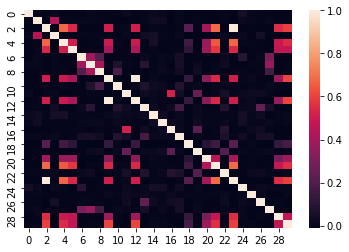

In [46]:
heat_map = sb.heatmap(pearsonr_array)

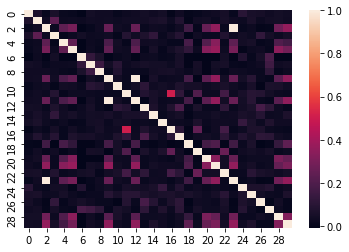

In [47]:
heat_map = sb.heatmap(spearmanr_array)

##### 5. Dự đoán và đánh giá
###### a. Naive Bayes

In [48]:
_len = data.collect().__len__()
X = []

for row in data.select('article').collect()[:-10]:
    row_data = preprocessing(row[0])
    tfidf_query = vectorizer.transform([row_data]).toarray()
    X += tfidf_query.tolist()
    
X = np.array(X)

In [49]:
Y = []
_dict = list(set([i[0] if i[0].__len__() < 20 else "Undefine"  for i in data.select('category').collect()]))

for i in data.select('category').collect()[:-10]:
    if i[0].__len__() < 20:
        Y.append(_dict.index(i[0]))
    else:
        Y.append(_dict.index("Undefine"))

        
Y = np.array(Y)

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [51]:
clf = GaussianNB()
clf.fit(X, Y)

GaussianNB()

In [88]:
X_test = []
for row in data.select('article').collect()[-9:]:
    row_data = preprocessing(row[0])
    tfidf_query = vectorizer.transform([row_data]).toarray()
    X_test.append(tfidf_query.tolist())

In [89]:
label = data.select('category').collect()[-9:]
true_label = [x[0] for x in label]
print("True label:", true_label)

True label: ['Giải trí', 'Số hóa', 'Số hóa', 'Số hóa', 'Số hóa', 'Số hóa', 'Số hóa', 'Số hóa', 'Thời sự']


In [90]:
pred_label = []
for x_t in X_test:
    pred_label.append(_dict[int(clf.predict(x_t))])
print("Predict label:", pred_label)

Predict label: ['Giải trí', 'Số hóa', 'Số hóa', 'Số hóa', 'Số hóa', 'Số hóa', 'Số hóa', 'Số hóa', 'Thời sự']


###### b. Đánh giá
Hàm đánh giá viết tay:

In [91]:
def tp_fp_fn(y_true, y_pred):
    #Calculate the precision
    #it's also known as accuracy
    tp = {}
    fp = {}
    fn = {}
    for label in np.unique(y_true):
        if label not in tp:
            tp[label] = 0
        if label not in fp:
            fp[label] = 0
        if label not in fn:
            fn[label] = 0
        #count true positive
        for i in range(len(y_pred)):
            if (y_pred[i] == y_true[i] == label):
                tp[label] += 1
    #count false negative
    for i in range(len(y_pred)):
        if (y_pred[i] != y_true[i]):
            if y_pred[i] in fn:
                fn[y_pred[i]] += 1
            else:
                fn[y_pred[i]] = 1
    #count false positive
    for i in range(len(y_true)):
        if (y_pred[i] != y_true[i]):
            if y_pred[i] in fn:
                fp[y_true[i]] += 1
            else:
                fp[y_true[i]] = 1
    return tp, fp, fn

In [92]:
def PR(tp, fp, fn):
    try:
        #calculate precision/recall
        P = float(tp)/(tp + fp)
        R = float(tp)/(tp + fn)
    except ZeroDivisionError:
        P = 0.0
        R = 0.0
    return (P, R)

In [93]:
def my_f1(y_true, y_pred):
    tp, fp, fn = tp_fp_fn(y_true, y_pred)
    f_1 = []
    for field in tp:
        P, R = PR(tp[field], fp[field], fn[field])
        try:
            f_1.append(2 * P * R / (P + R))
        except ZeroDivisionError:
            f_1.append(0.0)
    return f_1

In [94]:
def my_acc(y_true, y_pred):
    #Count sum
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return float(correct)/len(y_true)

In [95]:
def my_confusion_matrix(y_true, y_pred):
    if len(np.unique(y_true)) > len(np.unique(y_pred)):
        N = np.unique(y_true) # number of classes 
    else:
        N = np.unique(y_pred)
    cm = np.zeros((len(N), len(N)))
    for n in range(len(y_true)):
        cm[N.tolist().index(y_true[n]), N.tolist().index(y_pred[n])] += 1
    return cm

In [96]:
def conf_matrix_acc(cnf_matrix):
    #return confusion matrix accuracy
    return np.diagonal(cnf_matrix).sum()/cnf_matrix.sum()

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score #For checking

In [98]:
y_pred = [_dict.index(pred_) for pred_ in pred_label]
y_true = [_dict.index(true_) for true_ in true_label]

In [99]:
print(accuracy_score(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
print(f1_score(y_true, y_pred, average=None))

1.0
[[7 0 0]
 [0 1 0]
 [0 0 1]]
[1. 1. 1.]


In [100]:
print(my_acc(y_true, y_pred))
print(my_confusion_matrix(y_true, y_pred))
print(my_f1(y_true, y_pred))

1.0
[[7. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[1.0, 1.0, 1.0]


### Bài 2

In [101]:
d_viewer = {}
for j in [i[0] for i in data.select('viewer').collect() if i[0] != None]:
    for k in j.split(', '):
        d_viewer[k] = []

In [102]:
df_viewer = pd.DataFrame(data=d_viewer)

In [103]:
for i in data.select('viewer').collect():
    d_tmp = {}
    for k in df_viewer.columns:
        d_tmp[k] = [False]
        
        if i[0] != None:
            if k in i[0].split(", "):
                d_tmp[k] = [True]
    
    df_tmp = pd.DataFrame(data=d_tmp)
    df_viewer = df_viewer.append(df_tmp, ignore_index=True)

In [104]:
df_viewer

,['omega','Mai Nguyễn','Ph Trung','Hương','Chung Nguyen','Marco Max','Thanh Thanh','Ác Mộng Pép Si'],['kts.lyquochung','Nguyễn Đình Mùi',...,'Chương Hoàng','stonecool1988','Nguyễn Hân','Bủm','trungnguyen','Son Lan','Danh Tran Van','Mr_Che','Phan Cường','Quang Minh']
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
df_ = df_viewer.transpose()
df_

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
['omega',1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Mai Nguyễn',1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Ph Trung',1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hương',1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Chung Nguyen',1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
'Son Lan',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
'Danh Tran Van',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
'Mr_Che',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
'Phan Cường',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
!pip install mlxtend

In [107]:
from mlxtend.frequent_patterns import apriori, fpgrowth #For checking

In [108]:
apriori(df_, min_support=0.001, use_colnames=True)

,support,itemsets
0,0.006015,(0)
1,0.011278,(1)
2,0.011278,(2)
3,0.012030,(3)
4,0.008271,(4)
...,...,...
561,0.001504,"(2, 165, 134, 40, 118, 246)"
562,0.001504,"(163, 229, 18, 246, 23, 88)"
563,0.001504,"(165, 134, 40, 118, 23, 246)"
564,0.001504,"(2, 163, 229, 18, 246, 23, 88)"


In [109]:
fpgrowth(df_, min_support=0.001, use_colnames=True)

,support,itemsets
0,0.011278,(171)
1,0.006015,(0)
2,0.011278,(1)
3,0.011278,(36)
4,0.010526,(152)
...,...,...
561,0.001504,"(233, 207)"
562,0.001504,"(32, 159)"
563,0.001504,"(81, 194)"
564,0.001504,"(81, 101)"


In [110]:
import threading
import os

In [111]:
def apriori_h(df_, min_supp, use_colname):
    print(apriori(df_, min_support=min_supp, use_colnames=use_colname))

In [112]:
def fpgrowth_h(df_, min_supp, use_colname):
    print(fpgrowth(df_, min_support=min_supp, use_colnames=use_colname))

In [113]:
def Multithread():  
    t1= threading.Thread(target= apriori_h, args=(df_, 0.001, True))
    t2= threading.Thread(target= fpgrowth_h, args=(df_, 0.001, True))
    
    t1.start()
    t2.start()
    t1.join()
    t2.join()

In [114]:
if __name__ == '__main__':
     Multithread()

      support    itemsets
0    0.011278       (171)
1    0.006015         (0)
2    0.011278         (1)
3    0.011278        (36)
4    0.010526       (152)
..        ...         ...
561  0.001504  (233, 207)
562  0.001504   (32, 159)
563  0.001504   (81, 194)
564  0.001504   (81, 101)
565  0.011278   (89, 199)

[566 rows x 2 columns]
      support                         itemsets
0    0.006015                              (0)
1    0.011278                              (1)
2    0.011278                              (2)
3    0.012030                              (3)
4    0.008271                              (4)
..        ...                              ...
561  0.001504      (2, 165, 134, 40, 118, 246)
562  0.001504      (163, 229, 18, 246, 23, 88)
563  0.001504     (165, 134, 40, 118, 23, 246)
564  0.001504   (2, 163, 229, 18, 246, 23, 88)
565  0.001504  (2, 165, 134, 40, 118, 23, 246)

[566 rows x 2 columns]
